<a href="https://colab.research.google.com/github/kelseyneis/horoscope-mining/blob/main/classifier_sequential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
df = pd.read_csv('horoscope_saved.csv')
df.sample(frac=1.0)

,sign,category,date,horoscope
16356,sagittarius,birthday,20210224,Get great pleasure this year from countless li...
1761,aries,birthday,20210410,Set your sights on a personal goal this year. ...
19872,aquarius,birthday,20201003,Your inner child is near the surface this year...
3426,taurus,birthday,20201027,Friends and good times near to home smooth out...
19135,aquarius,career,20200928,You will feel anger and aggression coming from...
...,...,...,...,...
3044,taurus,wellness,20201011,Get some space today. You are filled with a se...
14078,scorpio,wellness,20201204,Powers of common sense triumph when you facili...
13749,scorpio,career,20210110,You may feel like your lucky stars are letting...
15099,sagittarius,love,20200918,You have a date with the past today. You may n...


In [ ]:
df.isnull().sum()

sign         0
category     0
date         0
horoscope    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df_love = df[df['category']=='love']
df_love

,sign,category,date,horoscope
365,aries,love,20200616,Love is deeply private and very passionate tod...
366,aries,love,20200617,Today's astral configuration may not be quite ...
367,aries,love,20200618,The current planetary energy encourages you to...
368,aries,love,20200619,You will enjoy the way your love life shifts i...
369,aries,love,20200620,The current astral energy may disrupt some of ...
...,...,...,...,...
20856,pisces,love,20210612,Today's astral configuration gives you the cha...
20857,pisces,love,20210613,The current aspect means you have a wonderful ...
20858,pisces,love,20210614,There is a fair amount of passion and intensit...
20859,pisces,love,20210615,"With today's astral energy, you have an amazin..."


In [ ]:
df_love = df_love.drop(columns=['category', 'date'])

In [ ]:
df_love = df_love.loc[df_love['sign'].isin(['aries','libra'])]

In [ ]:
y = np.array(df_love['sign'])
X = np.array(df_love['horoscope'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1000)
vectorizer = CountVectorizer(stop_words='english')
vectorizer.fit(np.array(X_train))
X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)
X_train = X_train.toarray()
X_test = X_test.toarray()
y_train_enc =  pd.factorize(y_train, sort=False)[0]
y_test_enc = pd.factorize(y_test, sort=False)[0]


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
%%time
classifier = LogisticRegression(max_iter=1e7)
classifier.fit(X_train, y_train_enc)
score = classifier.score(X_test, y_test_enc)
print("Accuracy:",score)

Accuracy: 0.4972677595628415
CPU times: user 189 ms, sys: 40 ms, total: 229 ms
Wall time: 130 ms


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf = KNeighborsClassifier(n_neighbors=40, metric='euclidean')
clf.fit(X_train, y_train_enc)
y_pred = clf.predict(X_test)
print("Accuracy:",clf.score(X_test,y_test_enc))




Accuracy: 0.5355191256830601


In [ ]:
from keras.models import Sequential
from keras import layers
print(X_train.shape)
print(y_train_enc.shape)
input_dim = X_train.shape[1]  # Number of features
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(100, input_dim=input_dim, activation='sigmoid'))
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='relu'))
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
model.summary()

(549, 2991)
(549,)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                29920     
                                                                 
 dense_13 (Dense)            (None, 100)               1100      
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 32,041
Trainable params: 32,041
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y_train_enc, y_train

(array([0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
        1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
        1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
        0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
        0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
        1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
        1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 

In [ ]:
import time

In [ ]:
tic = time.time()
history = model.fit(X_train, y_train_enc,epochs=500,verbose=False,validation_data=(X_test, y_test_enc),batch_size=100)
print("Time taken:",time.time() - tic)

Time taken: 26.625718116760254


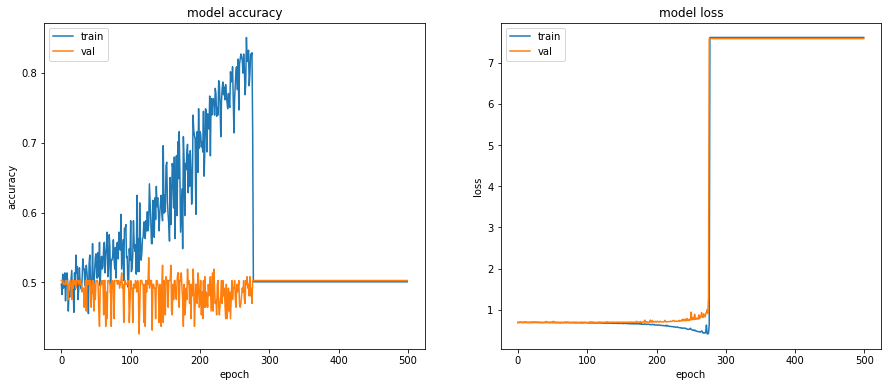

Training Accuracy: 0.5009
Testing Accuracy:  0.5027


In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.show()


loss, accuracy = model.evaluate(X_train, y_train_enc, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test_enc, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))